- Steps to be followed
-  Data Inspection
- Data Cleaning
- Handling Missing Data
    - Check the columns that can be imputed with 0
    - % of missing
    - Drop those with high missing
    - Compare No of Recharge vs Cost of recharge
    - Filter HVC(find the 70th percentile value for avg_rech_amt_6_7)
            - Rows should be left 29.9k
- EDA
- Outliers treatement
- Dummy Variable creation
- Train-Test Split
- Scaling
- Drive Chrun(y) on data month 9
- Data Preparation
- Modelling without PCA - 1 Model Logistic Regression with Hyperparameter Tuning
    (6,7,8)
- Modelling with PCA - 3 Models(Logistic Regression, Tree Model, with Hyperparameter Tuning
- Evaluation
- Explain your interpretable model and add reccomendation for your company

#### Impute Data  using Advanced Imputation  Technique </br>
- Interative Imputation
- KNN Imputation
- Capture pattern in the data
#### Data Balancing Technique </br>
- Random Oversampling
- Random Undersampling
- SMOTE
- Weight Of Class

##### Telecom Data
- Good Month(6,7)
- Action Phase(8)
- Churned(9)
- Predict the customer who are at high risks

In [1]:
# Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
telecom = pd.read_csv('telecom_churn_data.csv')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# Checking number of records and  and its colums
telecom.shape

(99999, 226)

In [5]:
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
telecom[telecom.columns[telecom.columns.str.contains("_6")]].shape

(99999, 54)

# Data Cleaning

In [7]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

The circle_id has a single value that is 109 and the following fields has zero value in entire records, so dropping the fields as it will add any significance to model circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9

In [8]:
# Droppin the above mentioned columns which has only single value in the field
telecom.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'], axis=1, inplace=True)

In [9]:
# Checking null values percentage in each columns
100*(telecom.isnull().sum(axis=0)/len(telecom))

mobile_number                0.000000
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_m

In [10]:
# Droppoing all the date columns as it is required here for churn cases identification.
telecom.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'], axis=True, inplace=True)

In [11]:
telecom.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [12]:
# Checking data in col column where recharge data is null
telecom[telecom['total_rech_data_6'].isnull()& telecom['total_rech_data_7'].isnull()].vol_3g_mb_6.value_counts()

0.0    67854
Name: vol_3g_mb_6, dtype: int64

In [13]:
# Columns 'vol_2g_mb_7','vol_2g_mb_8','vol_2g_mb_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','vol_3g_mb_9' has 0 usage where below metioned columns has null value so filling them with 0
cols = telecom.columns
filled_columns = []
for column in cols:
    if telecom[column].isnull().sum()/len(telecom) > .7:
        filled_columns.append(column)
        telecom[column] = telecom[column].fillna(0)
print('Following columns has been filled', filled_columns)

Following columns has been filled ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [14]:
# Checking null values percentage in each columns
100*(telecom.isnull().sum(axis=0)/len(telecom))

mobile_number         0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t2f_mou_7      3.859039
loc_og_t2f_mou_8      5.378054
loc_og_t

# Deriving Features

In [15]:
# Calculating total data recharge amount
telecom['total_recharche_amout_6'] = telecom['total_rech_amt_6'] + (telecom['total_rech_data_6']* telecom['av_rech_amt_data_6'])
telecom['total_recharche_amout_7'] = telecom['total_rech_amt_7'] + (telecom['total_rech_data_7']* telecom['av_rech_amt_data_7'])

# Calculating average amount
telecom['avg_rech_amt_6_7'] = (telecom['total_recharche_amout_6'] + telecom['total_recharche_amout_7'])/2


In [16]:
telecom['avg_rech_amt_6_7'].isnull().any()

False

### Filter high-value customers(HVC)
We are filtering for HVC customer here only as running KNN would take a lot time and resoure on 1 lakh data

In [17]:
telecom.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [18]:
# calculating percentile
telecom['avg_rech_amt_6_7'].quantile([.25,.50,.70,.90])

0.25     128.0
0.50     275.0
0.70     478.0
0.90    1028.0
Name: avg_rech_amt_6_7, dtype: float64

In [19]:
# creating dataset for high value customer based on 70th percintile data 
telecom_hvc = telecom[telecom['avg_rech_amt_6_7']>= 478.0]

In [20]:
telecom_hvc.shape

(30001, 205)

In [21]:
telecom_hvc.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100          NaN   
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
21     7002124215   514.453   597.753   637.760  578.596       102.41   
23     7000887461    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                NaN               NaN              0.00               NaN   
7                0.0               0.0              0.00               NaN   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0            NaN           NaN          0.00           NaN               NaN   
7         422.16        533.91        255.79           NaN              4.30   
8         378.09        288.18         63.04    

In [22]:
telecom_hvc1 = telecom_hvc.copy()

## Imputing Missing values using KNN now

In [23]:
# Revoming mobile number from the dataset before running KNN as it change the data format
mobile = pd.DataFrame({'mobile_number':telecom_hvc['mobile_number']},index=telecom_hvc.index)
telecom_hvc = telecom_hvc.drop(['mobile_number'], axis=1)

In [24]:
mobile.shape, telecom_hvc.shape

((30001, 1), (30001, 204))

In [25]:
# Importing library
from sklearn.impute import KNNImputer

In [26]:
imputer =KNNImputer(n_neighbors=5)
telecom_knn = pd.DataFrame(imputer.fit_transform(telecom_hvc))

In [27]:
telecom_knn.columns = telecom_hvc.columns

In [28]:
mobile= mobile.reset_index(drop=True)
telecom_knn = telecom_knn.reset_index(drop=True)

In [29]:
telecom_knn = pd.concat([mobile,telecom_knn], axis=1)

In [30]:
telecom_knn.shape

(30001, 205)

In [31]:
telecom_knn.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0     7000842753   197.385   214.816   213.803   21.100        1.764   
1     7000701601  1069.180  1349.850  3171.480  500.000       57.840   
2     7001524846   378.721   492.223   137.362  166.787      413.690   
3     7002124215   514.453   597.753   637.760  578.596      102.410   
4     7000887461    74.350   193.897   366.966  811.480       48.960   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         8.50         0.00        4.074         23.72        42.084   
1        54.68        52.29       54.808        453.43       567.160   
2       351.03        35.08       33.460         94.66        80.630   
3       132.11        85.14      161.630        757.93       896.680   
4        50.66        33.58       15.740         85.41        89.360   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00        24.010         17.852         11.322           0.00   
1        325.91       239.656         16.230         33.490          31.64   
2        136.48       108.710          0.000          0.000           0.00   
3        983.39       869.890          0.000          0.000           0.00   
4        205.89       111.880          0.000          0.000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0          7.054         15.176          8.928           0.00         17.948   
1         65.090         23.740         12.590          38.06         75.320   
2          0.000          0.000          0.000           0.00          0.000   
3          0.000          0.000          0.000           0.00          0.000   
4          0.000          0.000          0.000           0.00          0.000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0             1.658             1.958              0.00             2.702   
1            51.390            31.380             40.28            25.802   
2           297.130           217.590             12.49            26.130   
3             4.480             6.160             23.34            29.980   
4            48.960            50.660             33.58            15.740   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0             8.652            16.818              0.00             2.970   
1           308.630           447.380            162.28           105.478   
2            80.960            70.580             50.54            34.580   
3            91.810            87.930            104.81           107.540   
4            82.940            83.010            148.56            83.730   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00             3.688              0.00             0.016   
1             62.13            55.140             53.23            12.240   
2              0.00             0.000              0.00             0.000   
3              0.75             0.000              1.58             0.000   
4              0.00             0.000              0.00             2.450   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               0.0               0.0              0.00             0.000   
1               0.0               0.0              0.00             1.162   
2               0.0               0.0              7.15             0.000   
3               0.0               0.0              0.00             0.000   
4               0.0               0.0             17.71             4.080   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0        10.314        22.466          0.00         5.690              0.00   
1       422.160       533.910        255.79       143.528              4.30   
2       378.090       288.180         63.04        60.710            116.56   
3        97.040    

In [32]:
telecom_knn1 = telecom_knn.copy()

# Deriving Churn

In [35]:
# Deriving the churn customers
telecom_knn['churn'] = telecom_knn[['total_og_mou_9','total_ic_mou_9','vol_2g_mb_9','vol_3g_mb_9']].apply(lambda x: 1 if (x.total_og_mou_9==0.0 and x.total_ic_mou_9==0.0 and x.total_ic_mou_9==0.0 and x.vol_2g_mb_9==0.0 and x.vol_3g_mb_9==0.0) else 0, axis=1)

In [36]:
# Calculating Churn using month 9 data
telecom_knn['churn'].value_counts(normalize=False)

0    27560
1     2441
Name: churn, dtype: int64

Data is imbalanced

In [38]:
# Deleting the columns belonging to churn months
telecom_knn.drop(telecom_knn.columns[telecom_knn.columns.str.contains('_9')], axis=1, inplace=True)

# EDA

# Coninuous univariate analysis

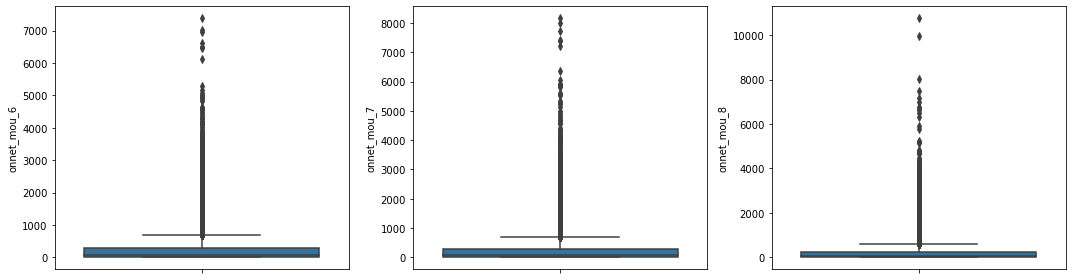

In [42]:
# Checking tred in onnet_mou_6, onnet_mou_7, onnet_mou_8
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(y=telecom_knn['onnet_mou_6'])
plt.subplot(1,3,2)
sns.boxplot(y=telecom_knn['onnet_mou_7'])
plt.subplot(1,3,3)
sns.boxplot(y=telecom_knn['onnet_mou_8'])
plt.tight_layout()
plt.show()

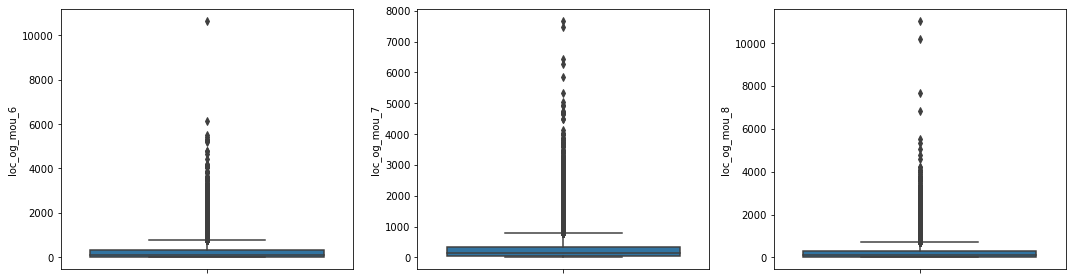

In [43]:
# Checking tred in onnet_mou_6, onnet_mou_7, onnet_mou_8
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(y=telecom_knn['loc_og_mou_6'])
plt.subplot(1,3,2)
sns.boxplot(y=telecom_knn['loc_og_mou_7'])
plt.subplot(1,3,3)
sns.boxplot(y=telecom_knn['loc_og_mou_8'])
plt.tight_layout()
plt.show()

# Categorical Univariate Analysis

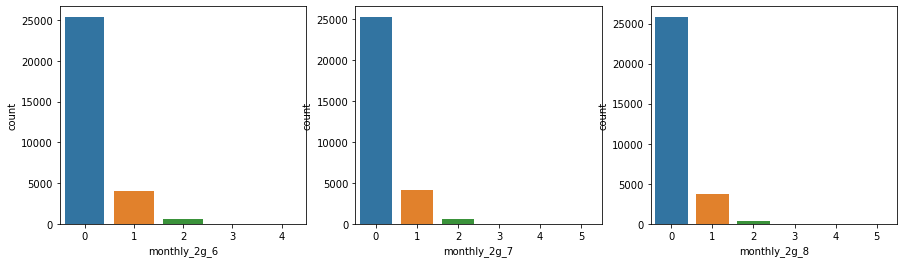

In [41]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.countplot(telecom_hvc['monthly_2g_6'])
plt.subplot(1,3,2)
sns.countplot(telecom_hvc['monthly_2g_7'])
plt.subplot(1,3,3)
sns.countplot(telecom_hvc['monthly_2g_8'])
plt.show()

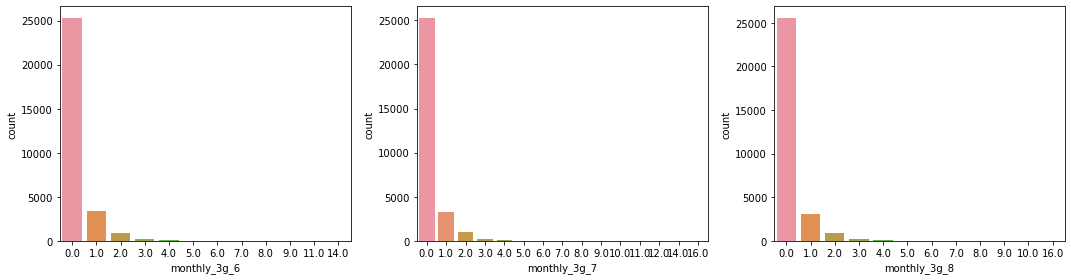

In [44]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.countplot(telecom_knn['monthly_3g_6'])
plt.subplot(1,3,2)
sns.countplot(telecom_knn['monthly_3g_7'])
plt.subplot(1,3,3)
sns.countplot(telecom_knn['monthly_3g_8'])
plt.tight_layout()
plt.show()

# Outlier Treatement

In [45]:
telecom_knn.describe()

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    261.575192   
std     6.908784e+05    460.640461    479.776947    501.961981    459.660253   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000609e+09    309.865000    309.826000    231.473000     18.240000   
50%     7.001203e+09    481.694000    480.943000    427.585000     85.410000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.760000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     268.234736    235.094672    375.122345    379.134699    337.061233   
std      479.811373    458.073841    481.786302    498.292648    480.952438   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       16.980000     12.690000     74.360000     71.660000     51.860000   
50%       83.180000     66.710000    223.430000    220.480000    183.760000   
75%      290.460000    240.710000    488.240000    494.010000    438.990000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       16.308560      12.827388      12.790515      26.896406   
std        76.462422      75.943186      74.273007     116.447444   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       20.341709      20.212191         84.696509         85.869984   
std        96.232583     104.762665        228.730334        240.478910   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.880000          5.010000   
50%         0.000000       0.000000         24.630000         24.910000   
75%         0.000000       0.000000         78.010000         78.510000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          78.512515        163.832761        163.561866        152.779909   
std          227.337708        249.826941        241.302157        233.199858   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.490000         20.460000         21.780000         15.880000   
50%           21.310000         77.890000         79.480000         68.880000   
75%           72.280000        209.040000        208.540000        197.060000   
max        10752.560000       4729.740000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean           6.382012          6.450569          5.939637          1.594707   
std           22.124365         21.940592         19.499139          6.303922   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.150000          0.230000          0.056000 

In [49]:
# Creating feature categoties
vars_cat = ['monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6', 'sachet_3g_7','sachet_3g_8']
vars_num = telecom_knn.columns.drop(vars_cat).drop('churn')

In [50]:
vars_num

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'sep_vbc_3g', 'total_recharche_amout_6',
       'total_recharche_amout_7', 'avg_rech_amt_6_7'],
      dtype='object', length=144)

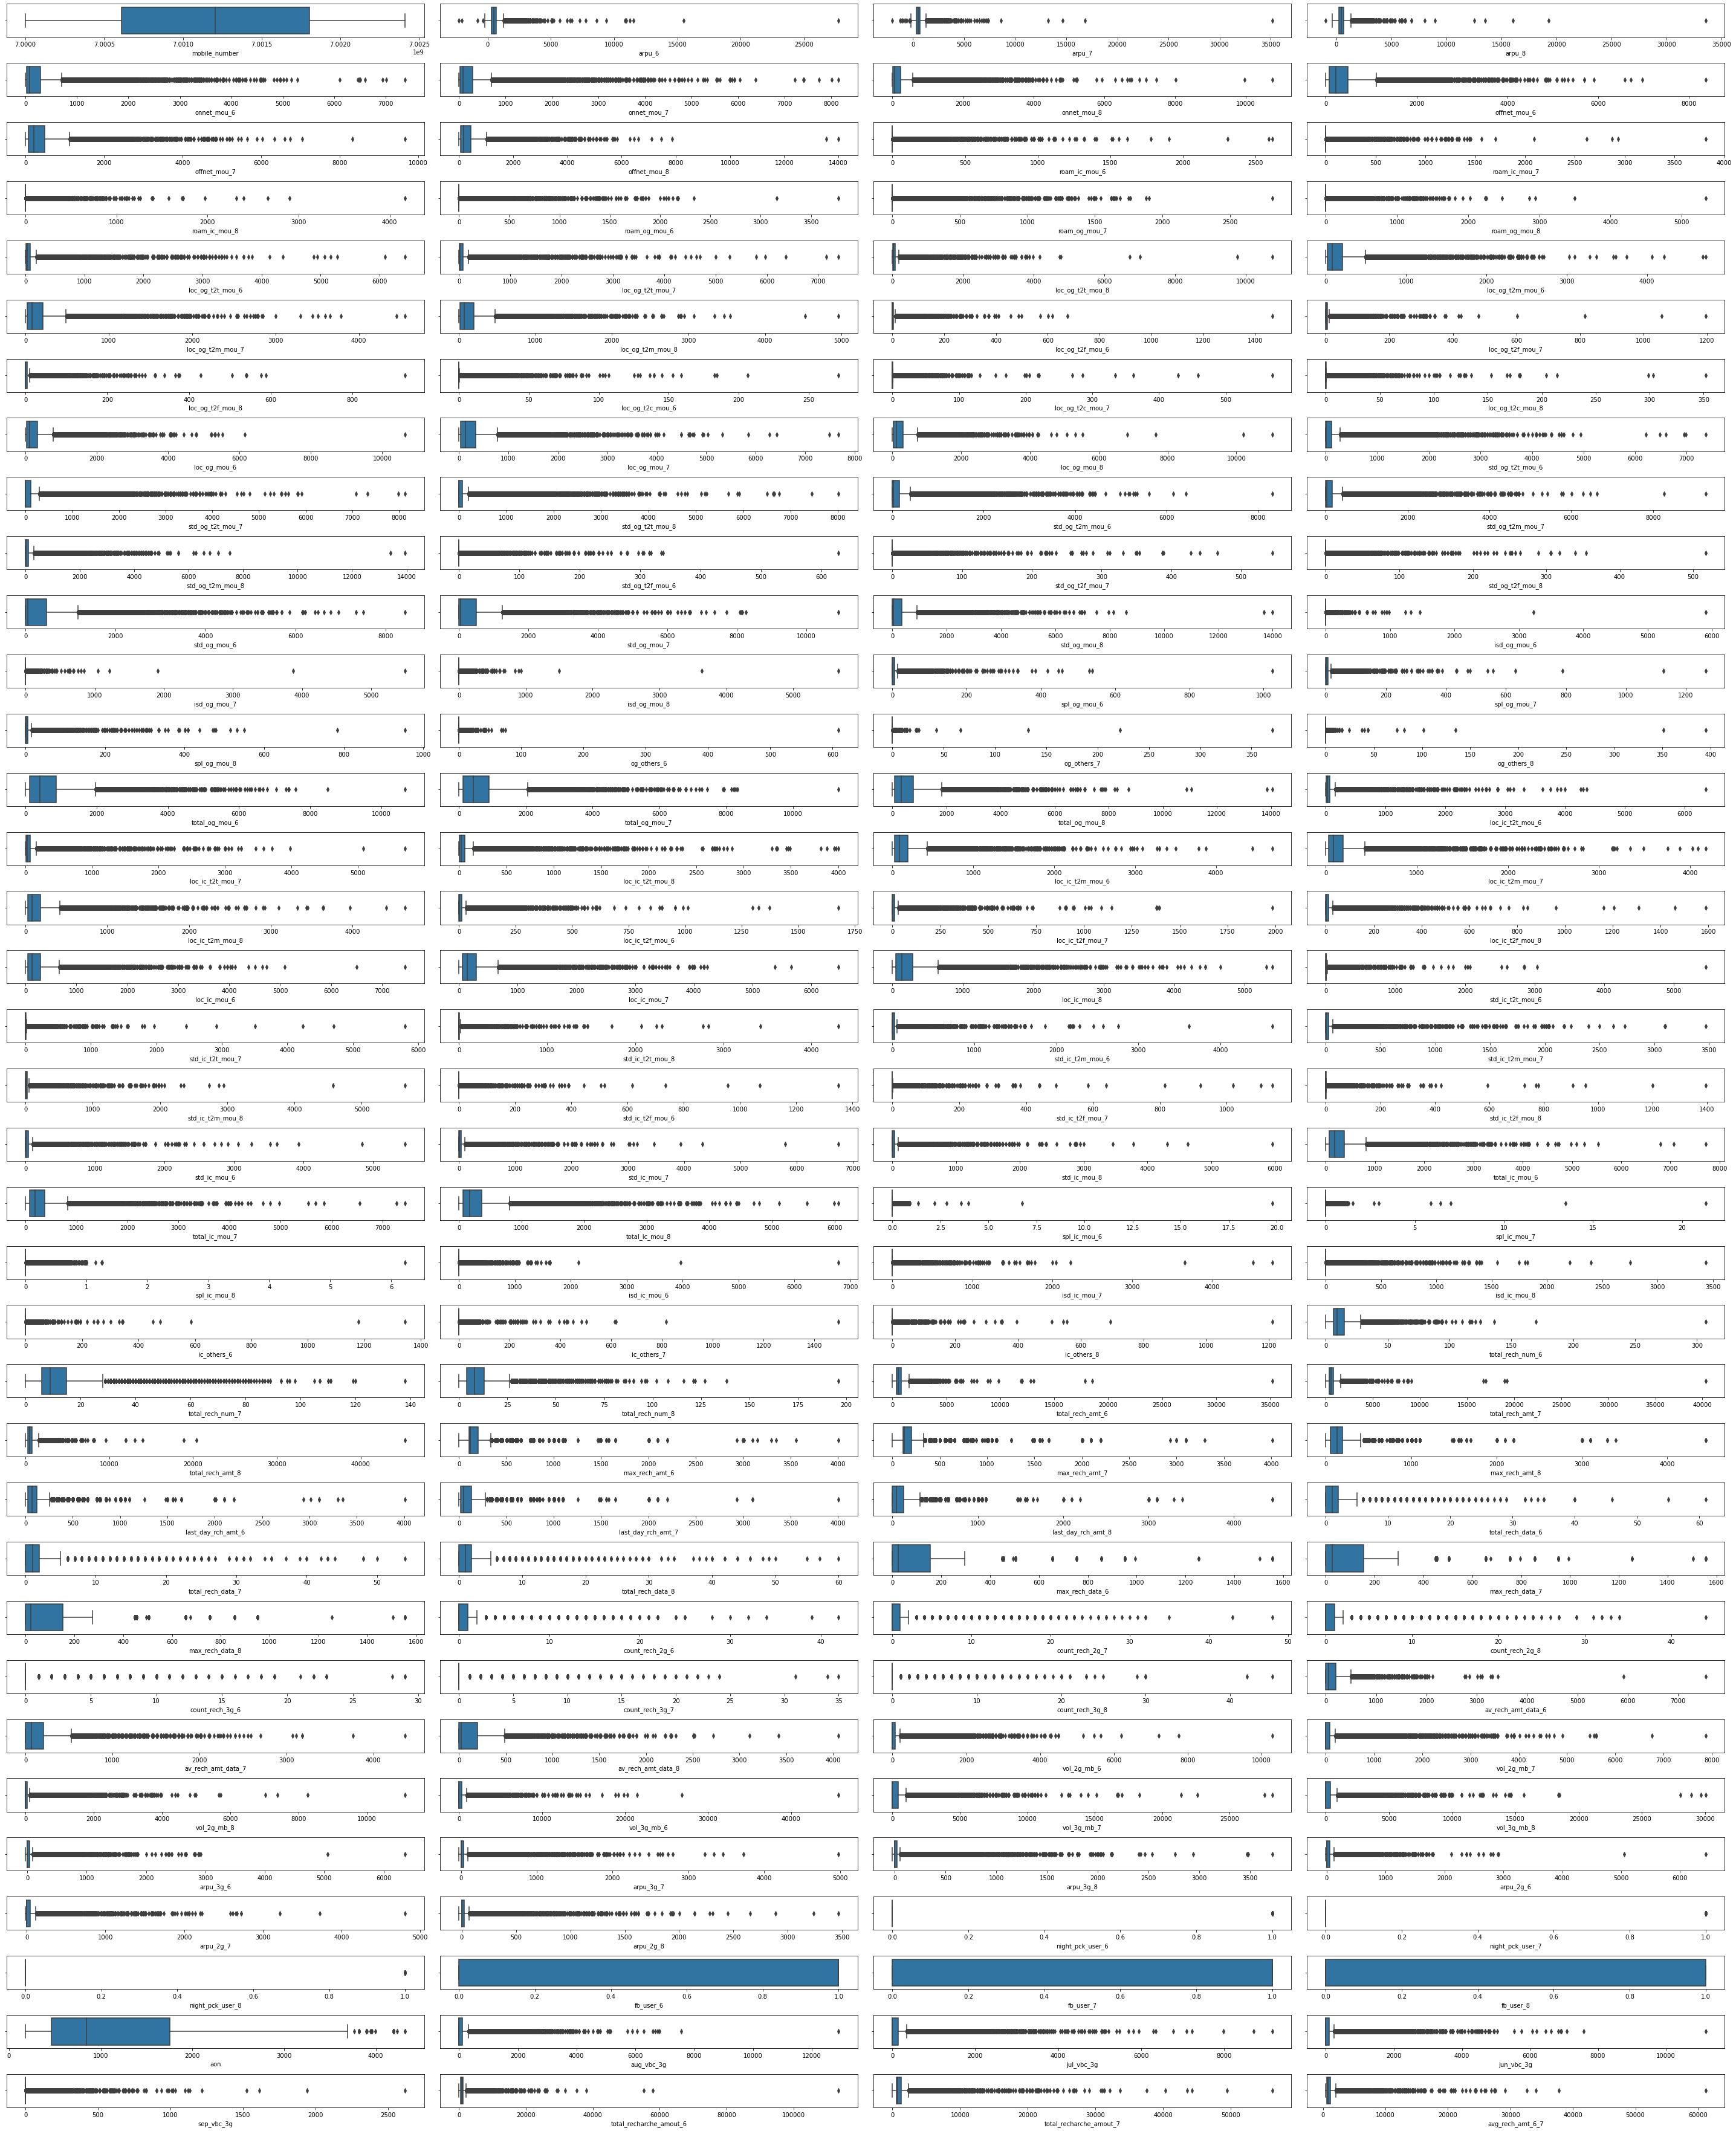

In [52]:
rows = len(vars_num)/4 + 1
plt.figure(figsize=(40,50))
for i,j in enumerate(vars_num):
    plt.subplot(rows,4,i+1)
    sns.boxplot(telecom_knn[j])
plt.tight_layout()
plt.show()

Here all the fields have outliers, capping and billing the same would result in loosing the actual data, there are may be customers who have high usage.

# Data Preparation

In [53]:
telecom_knn2 = telecom_knn.copy()

In [54]:
# Dropping some variable based high correlation
# Create correlation matrix
corr_matrix = telecom_knn[vars_num].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print('Dropped Columns are ', to_drop)
# Dropping highly correlated columns(> 85)
telecom_hvc.drop(to_drop, axis=1, inplace = True)

Dropped Columns are  ['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'avg_rech_amt_6_7']


# Dummification of categorical variables

In [55]:
# Checking values in the feature
telecom_knn['sachet_2g_6'].value_counts()

0.0     21256
1.0      3100
2.0      1505
3.0       940
4.0       742
5.0       516
6.0       444
7.0       339
8.0       291
9.0       229
10.0      194
11.0      119
12.0      111
13.0       53
14.0       44
15.0       28
17.0       18
16.0       16
19.0       13
18.0       13
22.0        7
20.0        6
21.0        5
25.0        3
24.0        3
32.0        1
34.0        1
39.0        1
30.0        1
27.0        1
42.0        1
Name: sachet_2g_6, dtype: int64

In [57]:
# Reducing the number of category in the sachet field to minimise the number of feature after dummification
telecom_knn['sachet_2g_6'].replace([18.0,19.0,16.0,22.0,25.0,24.0,20.0,21.0,32.0,34.0,39.0,27.0,30.0],31, inplace=True)
telecom_knn['sachet_2g_7'].replace([18.0,19.0,16.0,22.0,25.0,24.0,20.0,21.0,32.0,34.0,39.0,27.0,30.0],31, inplace=True)
telecom_knn['sachet_2g_8'].replace([18.0,19.0,16.0,22.0,25.0,24.0,20.0,21.0,32.0,34.0,39.0,27.0,30.0],31, inplace=True)
telecom_knn['sachet_3g_6'].replace([10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,16.0,22.0,25.0,24.0,20.0,21.0,32.0,34.0,39.0,27.0,30.0,31.0,32.0,33.0,34.0,35.0],36, inplace=True)
telecom_knn['sachet_3g_7'].replace([10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,16.0,22.0,25.0,24.0,20.0,21.0,32.0,34.0,39.0,27.0,30.0,31.0,32.0,33.0,34.0,35.0],36, inplace=True)
telecom_knn['sachet_3g_8'].replace([10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,16.0,22.0,25.0,24.0,20.0,21.0,32.0,34.0,39.0,27.0,30.0,31.0,32.0,33.0,34.0,35.0],36, inplace=True)

In [59]:
# dummification
for i in vars_cat:
    j = 'df_'+i
    j = pd.get_dummies(telecom_knn[i],prefix=i, drop_first=True)
    telecom_knn = pd.concat([telecom_knn,j], axis=1)
    telecom_knn.drop(i, axis=1, inplace=True)
telecom_knn.head()

KeyError: 'monthly_2g_6'

In [79]:
telecom_knn.describe()

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    261.575192   
std     6.908784e+05    460.640461    479.776947    501.961981    459.660253   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000609e+09    309.865000    309.826000    231.473000     18.240000   
50%     7.001203e+09    481.694000    480.943000    427.585000     85.410000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.760000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     268.234736    235.094672    375.122345    379.134699    337.061233   
std      479.811373    458.073841    481.786302    498.292648    480.952438   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       16.980000     12.690000     74.360000     71.660000     51.860000   
50%       83.180000     66.710000    223.430000    220.480000    183.760000   
75%      290.460000    240.710000    488.240000    494.010000    438.990000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       16.308560      12.827388      12.790515      26.896406   
std        76.462422      75.943186      74.273007     116.447444   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       20.341709      20.212191         84.696509         85.869984   
std        96.232583     104.762665        228.730334        240.478910   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.880000          5.010000   
50%         0.000000       0.000000         24.630000         24.910000   
75%         0.000000       0.000000         78.010000         78.510000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          78.512515        163.832761        163.561866        152.779909   
std          227.337708        249.826941        241.302157        233.199858   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.490000         20.460000         21.780000         15.880000   
50%           21.310000         77.890000         79.480000         68.880000   
75%           72.280000        209.040000        208.540000        197.060000   
max        10752.560000       4729.740000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean           6.382012          6.450569          5.939637          1.594707   
std           22.124365         21.940592         19.499139          6.303922   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.150000          0.230000          0.056000 

# Train Test Split

In [60]:
# Dependent and Independent variable
y = telecom_knn['churn']
x = telecom_knn.drop(['churn'], axis=1)

In [61]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=.7, test_size=.3, random_state = 2)

In [62]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21000, 295), (9001, 295), (21000,), (9001,))

In [63]:
x_train.head()

mobile_number    arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
10004     7001086439  1168.764  951.610  845.525        79.68        53.43   
5357      7000708191  1311.944  880.005  336.483      2993.66      1715.89   
4020      7000893882   868.171  800.280  639.484        56.76        34.31   
13502     7002338776   790.430   26.322    0.100      1065.34        14.01   
16206     7000409036   700.218  808.849  757.696       980.09      1277.14   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
10004        36.51        901.48        702.59        678.68           0.00   
5357        611.69        148.69        122.33         75.08           0.00   
4020         42.94        914.21       1189.79        788.23           3.35   
13502         0.00        407.29          0.00         10.61           0.00   
16206      1237.16        574.84        545.96        649.74           0.51   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
10004           0.00           0.00           0.00           0.00   
5357           24.78          11.84           0.00          43.24   
4020            0.00           0.00          12.98           0.00   
13502           0.00           0.00           0.00           0.00   
16206           0.00           0.00          16.50           0.00   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
10004           0.00             79.68             49.43             36.51   
5357           13.11             50.78             23.93             27.36   
4020            0.00             55.56             33.34             42.94   
13502           0.00             91.56              0.00              0.00   
16206           0.00             12.78              7.54             11.03   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
10004            612.78            600.98            553.89              0.00   
5357              32.36             24.88             38.11              0.00   
4020             403.51            444.56            390.08             20.41   
13502             88.04              0.00              0.00              0.00   
16206            249.21            281.86            307.51              5.46   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
10004              0.68              8.09               0.0               0.0   
5357               0.00              0.00               0.0               0.0   
4020               9.61              1.59               0.0               0.0   
13502              0.00              0.00               0.0               0.0   
16206              3.78              3.76               0.0               0.0   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
10004              0.00        692.46        651.09        598.51   
5357               0.00         83.14         48.81         65.48   
4020               5.63        479.49        487.53        434.63   
13502              0.00        179.61          0.00          0.00   
16206              0.21        267.46        293.19        322.31   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
10004              0.00              3.99              0.00            288.69   
5357            2942.88           1660.29            577.93            104.44   
4020               1.19              0.96              0.00            475.61   
13502            973.78             14.01              0.00            319.24   
16206            961.08           1269.59           1226.13            309.89   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
10004             90.38            116.68               0.0               0.0   
5357              84.96             31.18               0.0               0.0   
4020             731.11            390.91               0.0 

In [69]:
x_train.columns[1:144]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'sep_vbc_3g', 'total_recharche_amout_6',
       'total_recharche_amout_7', 'avg_rech_amt_6_7'],
      dtype='object', length=143)

# ReScaling

In [70]:
# Scaling
vars_tobe_scaled = telecom_knn.columns[1:144]
scaler = StandardScaler()
x_train[vars_tobe_scaled] = scaler.fit_transform(x_train[vars_tobe_scaled])

In [71]:
# Tranforming the test data 
x_test[vars_tobe_scaled] = scaler.transform(x_test[vars_tobe_scaled])

In [72]:
x_train.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
10004     7001086439  1.293294  0.765999  0.637665    -0.397879    -0.451468   
5357      7000708191  1.597396  0.624800 -0.333914     5.984750     3.066734   
4020      7000893882  0.654858  0.467590  0.244407    -0.448081    -0.491931   
13502     7002338776  0.489743 -1.058582 -0.975949     1.761059    -0.534891   
16206     7000409036  0.298140  0.484487  0.470031     1.574332     2.138224   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
10004    -0.435364      1.096391      0.652336      0.718440      -0.218773   
5357      0.831772     -0.472574     -0.515518     -0.550384      -0.218773   
4020     -0.421198      1.122923      1.632893      0.948724      -0.173760   
13502    -0.515796      0.066400     -0.761724     -0.685906      -0.218773   
16206     2.209699      0.415608      0.337096      0.657605      -0.211920   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
10004      -0.182431      -0.185046      -0.228958      -0.208633   
5357        0.181691      -0.014400      -0.228958       0.234416   
4020       -0.182431      -0.185046      -0.119398      -0.208633   
13502      -0.182431      -0.185046      -0.228958      -0.208633   
16206      -0.182431      -0.185046      -0.089686      -0.208633   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
10004      -0.192900         -0.016439         -0.147843         -0.179261   
5357       -0.070687         -0.145179         -0.254625         -0.218768   
4020       -0.192900         -0.123885         -0.215220         -0.151499   
13502      -0.192900          0.036482         -0.354832         -0.336899   
16206      -0.192900         -0.314455         -0.323258         -0.289275   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
10004          1.806053          1.823195          1.710066         -0.278988   
5357          -0.529853         -0.576697         -0.492835         -0.278988   
4020           0.963844          1.171588          1.010432          0.608964   
13502         -0.305768         -0.680341         -0.655604         -0.278988   
16206          0.342862          0.493819          0.657775         -0.041447   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
10004         -0.265427          0.114488         -0.251874         -0.220854   
5357          -0.296742         -0.313336         -0.251874         -0.220854   
4020           0.145814         -0.229252         -0.251874         -0.220854   
13502         -0.296742         -0.313336         -0.251874         -0.220854   
16206         -0.122667         -0.114496         -0.251874         -0.220854   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
10004         -0.242123      1.168971      1.065177      0.986229   
5357          -0.242123     -0.454816     -0.552472     -0.469782   
4020           0.545043      0.601424      0.625875      0.538579   
13502         -0.242123     -0.197731     -0.683570     -0.648645   
16206         -0.212761      0.036382      0.103902      0.231768   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
10004         -0.416064         -0.411579         -0.380329          0.267196   
5357           6.903396          3.597684          1.103190         -0.185097   
4020          -0.413104         -0.418913         -0.380329          0.726044   
13502          2.005898         -0.387324         -0.380329          0.342190   
16206          1.974311          2.651950          2.767088          0.319238   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
10004         -0.225481         -0.099327         -0.148284         -0.138728   
5357          -0.238052         -0.311691         -0.148284         -0.138728   
4020           1.260514          0.581805       

In [78]:
x_train['sachet_3g_8_29.0'].value_counts()

0    21000
Name: sachet_3g_8_29.0, dtype: int64

# Building Model without PCA

# Logistic Regression

In [73]:
# Dropping Mobile Number from train and test set
x_train_mobile = x_train['mobile_number']
x_test_mobile = x_test['mobile_number']
x_train = x_train.drop('mobile_number', axis=1)
x_test = x_test.drop('mobile_number', axis=1)

In [74]:
# Building model using statsmodels so that I can see p-value, coefficients of the features
import statsmodels.api as sm

In [80]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial(),class_weight='balanced')
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20718
Model Family:                Binomial   Df Model:                          281
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 29 Nov 2020   Deviance:                          nan
Time:                        17:14:06   Pearson chi2:                 7.16e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.156e+15   6.61e+06  -1.75e+08      0.000   -1.16e+15   -1.16e+15
arpu_6                   5.989e+13   1.92e+06   3.12e+07      0.000    5.99e+13    5.99e+13
arpu_7                   3.073e+13   2.23e+06   1.38e+07      0.000    3.07e+13    3.07e+13
arpu_8                   8.932e+13   2.09e+06   4.27e+07      0.000    8.93e+13    8.93e+13
onnet_mou_6              3.374e+13    3.6e+07   9.37e+05      0.000    3.37e+13    3.37e+13
onnet_mou_7             -1.273e+15   2.88e+07  -4.42e+07      0.000   -1.27e+15   -1.27e+15
onnet_mou_8              1.122e+15    2.8e+07   4.01e+07      0.000    1.12e+15    1.12e+15
offnet_mou_6            -3.864e+14   3.71e+07  -1.04e+07      0.000   -3.86e+14   -3.86e+14
offnet_mou_7            -4.521e+14   2.82e+07  -1.61e+07      0.000   -4.52e+14   -4.52e+14
offnet_mou_8             5.616e+14   2.82e+07   1.99e+07      0.000    5.62e+14    5.62e+14
roam_ic_mou_6            6.572e+12   7.09e+05   9.26e+06      0.000    6.57e+12    6.57e+12
roam_ic_mou_7           -7.386e+12    7.6e+05  -9.72e+06      0.000   -7.39e+12   -7.39e+12
roam_ic_mou_8             -3.7e+13   6.82e+05  -5.42e+07      0.000    -3.7e+13    -3.7e+13
roam_og_mou_6            3.294e+13   9.26e+06   3.56e+06      0.000    3.29e+13    3.29e+13
roam_og_mou_7            1.578e+14   5.71e+06   2.77e+07      0.000    1.58e+14    1.58e+14
roam_og_mou_8           -2.257e+14   6.48e+06  -3.48e+07      0.000   -2.26e+14   -2.26e+14
loc_og_t2t_mou_6         1.346e+17   1.84e+10   7.32e+06      0.000    1.35e+17    1.35e+17
loc_og_t2t_mou_7           3.5e+17   1.95e+10    1.8e+07      0.000     3.5e+17     3.5e+17
loc_og_t2t_mou_8        -4.041e+16   1.92e+10   -2.1e+06      0.000   -4.04e+16   -4.04e+16
loc_og_t2m_mou_6         1.491e+17   2.04e+10   7.33e+06      0.000    1.49e+17    1.49e+17
loc_og_t2m_mou_7         3.514e+17   1.96e+10   1.79e+07      0.000    3.51e+17    3.51e+17
loc_og_t2m_mou_8        -4.051e+16   1.94e+10  -2.08e+06      0.000   -4.05e+16   -4.05e+16
loc_og_t2f_mou_6         1.381e+16   1.88e+09   7.33e+06      0.000    1.38e+16    1.38e+16
loc_og_t2f_mou_7         3.178e+16   1.77e+09   1.79e+07      0.000    3.18e+16    3.18e+16
loc_og_t2f_mou_8        -3.257e+15   1.57e+09  -2.07e+06      0.000   -3.26e+15   -3.26e+15
loc_og_t2c_mou_6        -1.859e+13   5.92e+05  -3.14e+07      0.000   -1.86e+13   -1.86e+13
loc_og_t2c_mou_7        -5.232e+12   6.64e+05  -7.88e+06      0.000   -5.23e+12   -5.23e+12
loc_og_t2c_mou_8         1.758e+13   6.11e+05   2.88e+07      0.000    1.76e+13    1.76e+13
loc_og_mou_6            -2.245e+17   3.07e+10   -7.3e+06      0.000   -2.24e+17   -2.24e+17
loc_og_mou_7            -5.447e+17   3.04e+10  -1.79e+07      0.000   -5.45e+17   -5.45e+17
loc_og_mou_8             6.347e+16   3.04e+10  

#### Feaure Selecting Using RFE

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [102]:
# As data is imbalanced, so to balace the same using class_weight parameter
logreg = LogisticRegression(class_weight = 'balanced')
rfe = RFE(logreg, 20)
rfe.fit(x_train, y_train)

RFE(estimator=LogisticRegression(class_weight='balanced'),
    n_features_to_select=20)

In [103]:
cols = x_train.columns[rfe.support_]

In [104]:
cols

Index(['loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8',
       'total_rech_data_8', 'monthly_2g_8_1.0', 'monthly_2g_8_2.0',
       'monthly_2g_8_3.0', 'sachet_2g_7_12.0', 'sachet_2g_7_17.0',
       'sachet_2g_7_42.0', 'sachet_2g_8_31.0', 'monthly_3g_7_4.0',
       'monthly_3g_7_6.0', 'monthly_3g_8_1.0', 'monthly_3g_8_2.0',
       'sachet_3g_6_7.0', 'sachet_3g_6_9.0', 'sachet_3g_7_4.0',
       'sachet_3g_8_36.0'],
      dtype='object')

In [105]:
import statsmodels.api as sm

In [106]:
model2 = sm.GLM(y_train,(sm.add_constant(x_train[cols])), family = sm.families.Binomial(),class_weight = 'balanced')
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20979
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4226.1
Date:                Sun, 29 Nov 2020   Deviance:                       8452.3
Time:                        17:37:59   Pearson chi2:                 3.88e+07
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.7857      0.079    -48.043      0.000      -3.940      -3.631
loc_ic_mou_8          6.4702      0.410     15.773      0.000       5.666       7.274
std_ic_mou_8          3.3863      0.209     16.224      0.000       2.977       3.795
total_ic_mou_8      -10.7983      0.463    -23.312      0.000     -11.706      -9.890
isd_ic_mou_8          2.0988      0.104     20.128      0.000       1.894       2.303
total_rech_data_8    -1.1742      0.080    -14.591      0.000      -1.332      -1.016
monthly_2g_8_1.0     -1.6618      0.188     -8.843      0.000      -2.030      -1.294
monthly_2g_8_2.0     -1.8550      0.647     -2.867      0.004      -3.123      -0.587
monthly_2g_8_3.0    -21.1693    2.3e+04     -0.001      0.999   -4.51e+04    4.51e+04
sachet_2g_7_12.0      1.3203      0.593      2.226      0.026       0.158       2.483
sachet_2g_7_17.0      2.8217      1.337      2.111      0.035       0.202       5.441
sachet_2g_7_42.0     33.7893   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
sachet_2g_8_31.0      4.3765      1.246      3.511      0.000       1.934       6.819
monthly_3g_7_4.0    -21.0381   1.58e+04     -0.001      0.999    -3.1e+04    3.09e+04
monthly_3g_7_6.0    -25.9330   2.42e+04     -0.001      0.999   -4.76e+04    4.75e+04
monthly_3g_8_1.0     -1.4268      0.155     -9.185      0.000      -1.731      -1.122
monthly_3g_8_2.0     -1.3879      0.312     -4.448      0.000      -1.999      -0.776
sachet_3g_6_7.0       1.2518      0.659      1.900      0.057      -0.040       2.543
sachet_3g_6_9.0       2.2161      0.894      2.478      0.013       0.463       3.969
sachet_3g_7_4.0       0.8615      0.461      1.869      0.062      -0.042       1.765
sachet_3g_8_36.0      4.5835      0.892      5.137      0.000       2.835       6.332
=====================================================================================
"""

In [107]:
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics

# logreg  = LogisticRegression(class_weight = 'balanced')
# logreg.fit(x_train, y_train)

# y_pred = logreg.predict(x_train)

# print("Accuracy : ", metrics.accuracy_score(y_train, y_pred))
# print("Recall : ", metrics.recall_score(y_train, y_pred))

In [108]:
# Checking Test Accuracy
# y_test_pred = logreg.predict(x_test)

# print("Accuracy : ", metrics.accuracy_score(y_test, y_test_pred))
# print("Recall : ", metrics.recall_score(y_test, y_test_pred))

In [115]:
cols = ['onnet_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8', 'total_rech_data_8',
       'monthly_2g_7_2.0', 'monthly_2g_8_1.0', 'monthly_2g_8_2.0',
       'monthly_2g_8_3.0', 'sachet_2g_6_11.0', 'sachet_2g_7_12.0',
       'sachet_2g_7_17.0', 'sachet_2g_7_42.0', 'sachet_2g_8_31.0',
       'monthly_3g_7_4.0', 'monthly_3g_7_6.0', 'monthly_3g_8_1.0',
       'monthly_3g_8_2.0', 'sachet_3g_6_7.0', 'sachet_3g_6_9.0',
       'sachet_3g_7_4.0', 'sachet_3g_8_36.0']

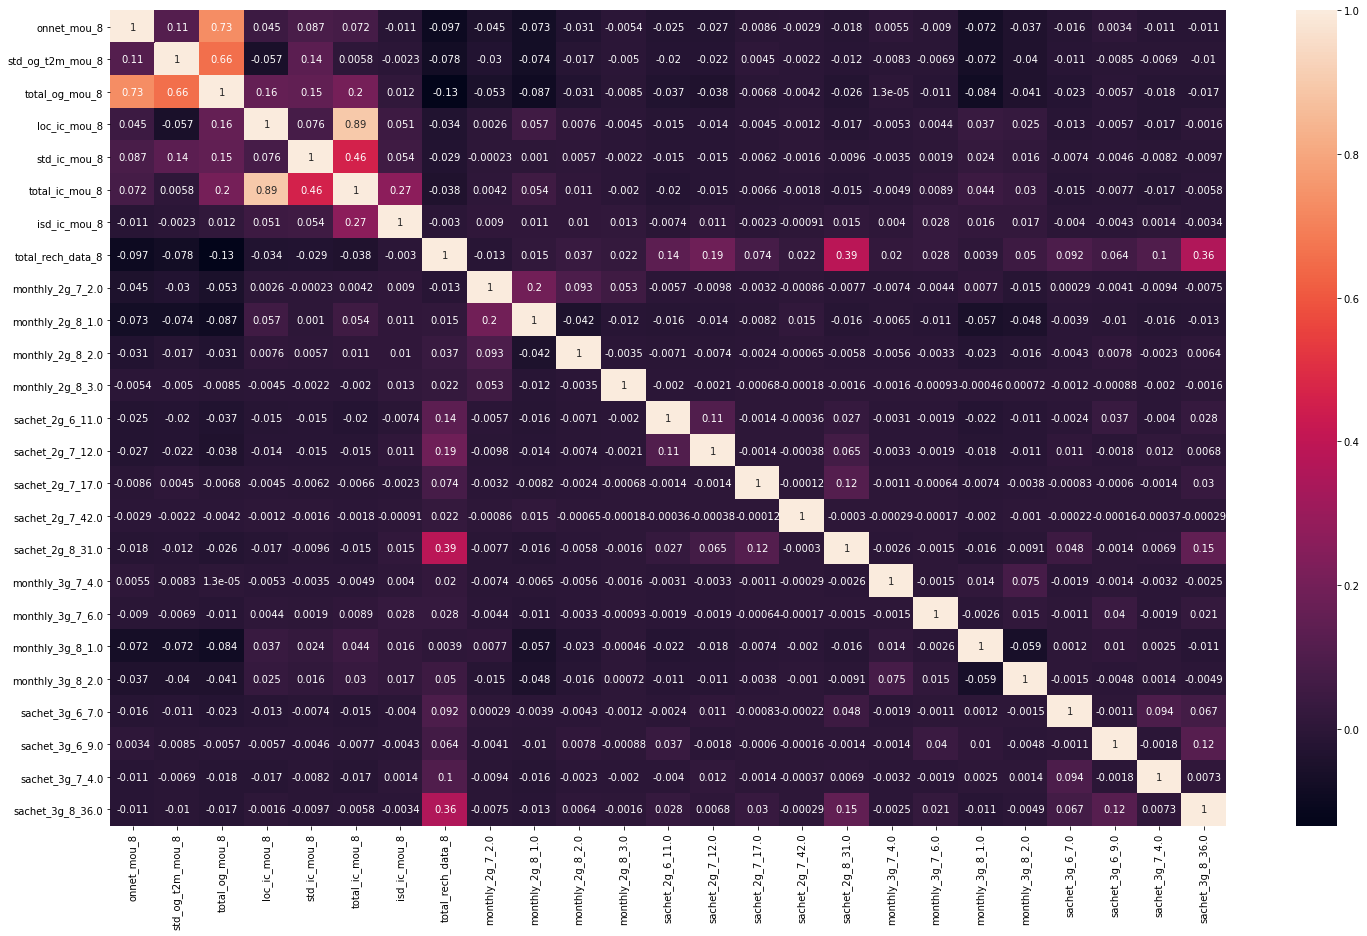

In [116]:
# Checking correlations of above columns
plt.figure(figsize=(25,15))
sns.heatmap(telecom_knn[cols].corr(), annot=True)
plt.show()

In [117]:
# total_og_mou_8 is highly correlated with onnet_mou_8
# total_ic_mou_8 is highly correlated with loc_ic_mou_8
# So, dropping total_og_mou_8 and total_ic_mou_8
cols = ['loc_ic_mou_8', 'std_ic_mou_8','isd_ic_mou_8',
       'total_rech_data_8', 'monthly_2g_8_1.0', 'monthly_2g_8_2.0',
       'monthly_2g_8_3.0', 'sachet_2g_7_12.0', 'sachet_2g_7_17.0',
       'sachet_2g_7_42.0', 'sachet_2g_8_31.0', 'monthly_3g_7_4.0',
       'monthly_3g_7_6.0', 'monthly_3g_8_1.0', 'monthly_3g_8_2.0',
       'sachet_3g_6_7.0', 'sachet_3g_6_9.0', 'sachet_3g_7_4.0',
       'sachet_3g_8_36.0']

In [118]:
model3 = sm.GLM(y_train,(sm.add_constant(x_train[cols])), family = sm.families.Binomial())
model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20980
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4680.9
Date:                Sun, 29 Nov 2020   Deviance:                       9361.7
Time:                        17:46:13   Pearson chi2:                 5.65e+06
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.5507      0.069    -51.439      0.000      -3.686      -3.415
loc_ic_mou_8         -2.3684      0.102    -23.333      0.000      -2.567      -2.169
std_ic_mou_8         -0.8389      0.106     -7.947      0.000      -1.046      -0.632
isd_ic_mou_8         -0.0610      0.049     -1.241      0.214      -0.157       0.035
total_rech_data_8    -1.3311      0.083    -16.057      0.000      -1.494      -1.169
monthly_2g_8_1.0     -1.7641      0.186     -9.499      0.000      -2.128      -1.400
monthly_2g_8_2.0     -1.4978      0.587     -2.551      0.011      -2.649      -0.347
monthly_2g_8_3.0    -21.2377   2.31e+04     -0.001      0.999   -4.53e+04    4.53e+04
sachet_2g_7_12.0      1.2747      0.603      2.113      0.035       0.092       2.457
sachet_2g_7_17.0      2.8834      1.363      2.116      0.034       0.212       5.554
sachet_2g_7_42.0     34.2302   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
sachet_2g_8_31.0      5.0021      1.263      3.962      0.000       2.528       7.477
monthly_3g_7_4.0    -21.3397   1.59e+04     -0.001      0.999   -3.12e+04    3.12e+04
monthly_3g_7_6.0    -20.9759   2.33e+04     -0.001      0.999   -4.58e+04    4.57e+04
monthly_3g_8_1.0     -1.0566      0.140     -7.547      0.000      -1.331      -0.782
monthly_3g_8_2.0     -0.7499      0.271     -2.764      0.006      -1.282      -0.218
sachet_3g_6_7.0       1.7189      0.560      3.067      0.002       0.620       2.817
sachet_3g_6_9.0       2.4085      0.938      2.567      0.010       0.570       4.247
sachet_3g_7_4.0       0.7399      0.466      1.588      0.112      -0.174       1.653
sachet_3g_8_36.0      5.4020      0.869      6.214      0.000       3.698       7.106
=====================================================================================
"""

In [119]:
# Dropping sachet_2g_7_42.0 as it has high p-value
cols = ['loc_ic_mou_8', 'std_ic_mou_8','isd_ic_mou_8',
       'total_rech_data_8', 'monthly_2g_8_1.0', 'monthly_2g_8_2.0',
       'monthly_2g_8_3.0', 'sachet_2g_7_12.0', 'sachet_2g_7_17.0',
       'sachet_2g_8_31.0', 'monthly_3g_7_4.0',
       'monthly_3g_7_6.0', 'monthly_3g_8_1.0', 'monthly_3g_8_2.0',
       'sachet_3g_6_7.0', 'sachet_3g_6_9.0', 'sachet_3g_7_4.0',
       'sachet_3g_8_36.0']

In [120]:
model4 = sm.GLM(y_train,(sm.add_constant(x_train[cols])), family = sm.families.Binomial())
model4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20981
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4690.5
Date:                Sun, 29 Nov 2020   Deviance:                       9380.9
Time:                        17:48:12   Pearson chi2:                 5.41e+06
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.5381      0.069    -51.600      0.000      -3.672      -3.404
loc_ic_mou_8         -2.3659      0.101    -23.335      0.000      -2.565      -2.167
std_ic_mou_8         -0.8391      0.106     -7.951      0.000      -1.046      -0.632
isd_ic_mou_8         -0.0611      0.049     -1.244      0.213      -0.157       0.035
total_rech_data_8    -1.3044      0.082    -16.003      0.000      -1.464      -1.145
monthly_2g_8_1.0     -1.7390      0.183     -9.507      0.000      -2.097      -1.380
monthly_2g_8_2.0     -1.5138      0.587     -2.579      0.010      -2.665      -0.363
monthly_2g_8_3.0    -21.2624   2.31e+04     -0.001      0.999   -4.53e+04    4.53e+04
sachet_2g_7_12.0      1.2459      0.601      2.075      0.038       0.069       2.423
sachet_2g_7_17.0      2.8522      1.357      2.101      0.036       0.192       5.513
sachet_2g_8_31.0      4.8665      1.256      3.876      0.000       2.405       7.328
monthly_3g_7_4.0    -21.3486   1.59e+04     -0.001      0.999   -3.12e+04    3.12e+04
monthly_3g_7_6.0    -20.9927   2.34e+04     -0.001      0.999   -4.58e+04    4.58e+04
monthly_3g_8_1.0     -1.0639      0.140     -7.604      0.000      -1.338      -0.790
monthly_3g_8_2.0     -0.7659      0.271     -2.825      0.005      -1.297      -0.235
sachet_3g_6_7.0       1.6990      0.558      3.043      0.002       0.605       2.793
sachet_3g_6_9.0       2.3880      0.931      2.565      0.010       0.563       4.213
sachet_3g_7_4.0       0.7240      0.465      1.557      0.119      -0.187       1.635
sachet_3g_8_36.0      5.2925      0.866      6.113      0.000       3.596       6.989
=====================================================================================
"""

In [121]:
# Dropping monthly_2g_8_3.0 as it has high p-value
cols = ['loc_ic_mou_8', 'std_ic_mou_8','isd_ic_mou_8',
       'total_rech_data_8', 'monthly_2g_8_1.0', 'monthly_2g_8_2.0',
       'sachet_2g_7_12.0', 'sachet_2g_7_17.0',
       'sachet_2g_8_31.0', 'monthly_3g_7_4.0',
       'monthly_3g_7_6.0', 'monthly_3g_8_1.0', 'monthly_3g_8_2.0',
       'sachet_3g_6_7.0', 'sachet_3g_6_9.0', 'sachet_3g_7_4.0',
       'sachet_3g_8_36.0']

In [122]:
model5 = sm.GLM(y_train,(sm.add_constant(x_train[cols])), family = sm.families.Binomial())
model5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20982
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4691.6
Date:                Sun, 29 Nov 2020   Deviance:                       9383.2
Time:                        19:57:21   Pearson chi2:                 5.45e+06
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.5414      0.069    -51.624      0.000      -3.676      -3.407
loc_ic_mou_8         -2.3655      0.101    -23.331      0.000      -2.564      -2.167
std_ic_mou_8         -0.8384      0.106     -7.946      0.000      -1.045      -0.632
isd_ic_mou_8         -0.0612      0.049     -1.247      0.212      -0.157       0.035
total_rech_data_8    -1.3110      0.082    -16.057      0.000      -1.471      -1.151
monthly_2g_8_1.0     -1.7363      0.183     -9.492      0.000      -2.095      -1.378
monthly_2g_8_2.0     -1.5091      0.587     -2.570      0.010      -2.660      -0.358
sachet_2g_7_12.0      1.2538      0.601      2.086      0.037       0.076       2.432
sachet_2g_7_17.0      2.8605      1.359      2.105      0.035       0.197       5.524
sachet_2g_8_31.0      4.9005      1.257      3.898      0.000       2.437       7.364
monthly_3g_7_4.0    -21.3459   1.59e+04     -0.001      0.999   -3.12e+04    3.12e+04
monthly_3g_7_6.0    -20.9875   2.34e+04     -0.001      0.999   -4.58e+04    4.58e+04
monthly_3g_8_1.0     -1.0618      0.140     -7.588      0.000      -1.336      -0.788
monthly_3g_8_2.0     -0.7614      0.271     -2.808      0.005      -1.293      -0.230
sachet_3g_6_7.0       1.7041      0.559      3.050      0.002       0.609       2.799
sachet_3g_6_9.0       2.3937      0.933      2.566      0.010       0.566       4.222
sachet_3g_7_4.0       0.7285      0.465      1.566      0.117      -0.183       1.640
sachet_3g_8_36.0      5.3194      0.866      6.141      0.000       3.622       7.017
=====================================================================================
"""

In [123]:
# Dropping monthly_3g_7_4.0 as it has high p-value
cols = ['loc_ic_mou_8', 'std_ic_mou_8','isd_ic_mou_8',
       'total_rech_data_8', 'monthly_2g_8_1.0', 'monthly_2g_8_2.0',
       'sachet_2g_7_12.0', 'sachet_2g_7_17.0',
       'sachet_2g_8_31.0',
       'monthly_3g_7_6.0', 'monthly_3g_8_1.0', 'monthly_3g_8_2.0',
       'sachet_3g_6_7.0', 'sachet_3g_6_9.0', 'sachet_3g_7_4.0',
       'sachet_3g_8_36.0']

In [124]:
model6 = sm.GLM(y_train,(sm.add_constant(x_train[cols])), family = sm.families.Binomial())
model6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20983
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4694.1
Date:                Sun, 29 Nov 2020   Deviance:                       9388.2
Time:                        19:58:22   Pearson chi2:                 5.46e+06
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.5437      0.069    -51.664      0.000      -3.678      -3.409
loc_ic_mou_8         -2.3647      0.101    -23.324      0.000      -2.563      -2.166
std_ic_mou_8         -0.8372      0.105     -7.939      0.000      -1.044      -0.631
isd_ic_mou_8         -0.0609      0.049     -1.242      0.214      -0.157       0.035
total_rech_data_8    -1.3152      0.082    -16.101      0.000      -1.475      -1.155
monthly_2g_8_1.0     -1.7357      0.183     -9.489      0.000      -2.094      -1.377
monthly_2g_8_2.0     -1.5054      0.587     -2.564      0.010      -2.656      -0.355
sachet_2g_7_12.0      1.2594      0.602      2.094      0.036       0.080       2.438
sachet_2g_7_17.0      2.8664      1.360      2.108      0.035       0.202       5.531
sachet_2g_8_31.0      4.9224      1.258      3.913      0.000       2.457       7.388
monthly_3g_7_6.0    -19.9770   1.42e+04     -0.001      0.999   -2.78e+04    2.78e+04
monthly_3g_8_1.0     -1.0652      0.140     -7.614      0.000      -1.339      -0.791
monthly_3g_8_2.0     -0.7946      0.271     -2.933      0.003      -1.326      -0.264
sachet_3g_6_7.0       1.7083      0.559      3.055      0.002       0.612       2.804
sachet_3g_6_9.0       2.3984      0.934      2.568      0.010       0.568       4.229
sachet_3g_7_4.0       0.7322      0.465      1.573      0.116      -0.180       1.644
sachet_3g_8_36.0      5.3369      0.866      6.159      0.000       3.639       7.035
=====================================================================================
"""

In [125]:
# Dropping monthly_3g_7_6.0 as it has high p-value
cols = ['loc_ic_mou_8', 'std_ic_mou_8','isd_ic_mou_8',
       'total_rech_data_8', 'monthly_2g_8_1.0', 'monthly_2g_8_2.0',
       'sachet_2g_7_12.0', 'sachet_2g_7_17.0',
       'sachet_2g_8_31.0',
       'monthly_3g_8_1.0', 'monthly_3g_8_2.0',
       'sachet_3g_6_7.0', 'sachet_3g_6_9.0', 'sachet_3g_7_4.0',
       'sachet_3g_8_36.0']

In [126]:
model7 = sm.GLM(y_train,(sm.add_constant(x_train[cols])), family = sm.families.Binomial())
model7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4694.9
Date:                Sun, 29 Nov 2020   Deviance:                       9389.8
Time:                        19:59:10   Pearson chi2:                 5.46e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.5449      0.069    -51.684      0.000      -3.679      -3.410
loc_ic_mou_8         -2.3638      0.101    -23.321      0.000      -2.562      -2.165
std_ic_mou_8         -0.8370      0.105     -7.937      0.000      -1.044      -0.630
isd_ic_mou_8         -0.0610      0.049     -1.244      0.213      -0.157       0.035
total_rech_data_8    -1.3180      0.082    -16.135      0.000      -1.478      -1.158
monthly_2g_8_1.0     -1.7344      0.183     -9.483      0.000      -2.093      -1.376
monthly_2g_8_2.0     -1.5032      0.587     -2.560      0.010      -2.654      -0.352
sachet_2g_7_12.0      1.2629      0.602      2.099      0.036       0.083       2.442
sachet_2g_7_17.0      2.8700      1.360      2.110      0.035       0.204       5.536
sachet_2g_8_31.0      4.9371      1.258      3.923      0.000       2.471       7.404
monthly_3g_8_1.0     -1.0640      0.140     -7.605      0.000      -1.338      -0.790
monthly_3g_8_2.0     -0.8030      0.271     -2.965      0.003      -1.334      -0.272
sachet_3g_6_7.0       1.7107      0.559      3.058      0.002       0.614       2.807
sachet_3g_6_9.0       2.4008      0.934      2.569      0.010       0.569       4.232
sachet_3g_7_4.0       0.7343      0.465      1.577      0.115      -0.178       1.647
sachet_3g_8_36.0      5.3485      0.867      6.172      0.000       3.650       7.047
=====================================================================================
"""

In [127]:
# Dropping isd_ic_mou_8 as it has high p-value
cols = ['loc_ic_mou_8', 'std_ic_mou_8',
       'total_rech_data_8', 'monthly_2g_8_1.0', 'monthly_2g_8_2.0',
       'sachet_2g_7_12.0', 'sachet_2g_7_17.0',
       'sachet_2g_8_31.0',
       'monthly_3g_8_1.0', 'monthly_3g_8_2.0',
       'sachet_3g_6_7.0', 'sachet_3g_6_9.0', 'sachet_3g_7_4.0',
       'sachet_3g_8_36.0']

In [128]:
model8 = sm.GLM(y_train,(sm.add_constant(x_train[cols])), family = sm.families.Binomial())
model8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4695.8
Date:                Sun, 29 Nov 2020   Deviance:                       9391.7
Time:                        20:00:18   Pearson chi2:                 5.63e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.5447      0.069    -51.670      0.000      -3.679      -3.410
loc_ic_mou_8         -2.3689      0.101    -23.369      0.000      -2.568      -2.170
std_ic_mou_8         -0.8471      0.105     -8.041      0.000      -1.054      -0.641
total_rech_data_8    -1.3174      0.082    -16.131      0.000      -1.477      -1.157
monthly_2g_8_1.0     -1.7359      0.183     -9.491      0.000      -2.094      -1.377
monthly_2g_8_2.0     -1.5091      0.587     -2.571      0.010      -2.660      -0.359
sachet_2g_7_12.0      1.2664      0.602      2.105      0.035       0.087       2.446
sachet_2g_7_17.0      2.8715      1.360      2.112      0.035       0.207       5.536
sachet_2g_8_31.0      4.9369      1.258      3.923      0.000       2.471       7.403
monthly_3g_8_1.0     -1.0657      0.140     -7.619      0.000      -1.340      -0.792
monthly_3g_8_2.0     -0.8063      0.271     -2.977      0.003      -1.337      -0.276
sachet_3g_6_7.0       1.7139      0.559      3.064      0.002       0.618       2.810
sachet_3g_6_9.0       2.4078      0.935      2.575      0.010       0.575       4.241
sachet_3g_7_4.0       0.7374      0.466      1.584      0.113      -0.175       1.650
sachet_3g_8_36.0      5.3491      0.867      6.171      0.000       3.650       7.048
=====================================================================================
"""

In [132]:
# Dropping sachet_3g_7_4.0 as it has high p-value
cols = ['loc_ic_mou_8', 'std_ic_mou_8',
       'total_rech_data_8', 'monthly_2g_8_1.0', 'monthly_2g_8_2.0',
       'sachet_2g_7_12.0', 'sachet_2g_7_17.0',
       'sachet_2g_8_31.0',
       'monthly_3g_8_1.0', 'monthly_3g_8_2.0',
       'sachet_3g_6_9.0', 'sachet_3g_7_4.0',
       'sachet_3g_8_36.0']

In [133]:
x_train_sm = sm.add_constant(x_train[cols])
logm10 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
final_model = logm10.fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4699.7
Date:                Sun, 29 Nov 2020   Deviance:                       9399.4
Time:                        20:02:47   Pearson chi2:                 5.57e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.5381      0.068    -51.724      0.000      -3.672      -3.404
loc_ic_mou_8         -2.3707      0.101    -23.392      0.000      -2.569      -2.172
std_ic_mou_8         -0.8486      0.105     -8.052      0.000      -1.055      -0.642
total_rech_data_8    -1.3042      0.081    -16.068      0.000      -1.463      -1.145
monthly_2g_8_1.0     -1.7360      0.183     -9.495      0.000      -2.094      -1.378
monthly_2g_8_2.0     -1.5203      0.587     -2.590      0.010      -2.671      -0.370
sachet_2g_7_12.0      1.2635      0.602      2.099      0.036       0.084       2.443
sachet_2g_7_17.0      2.8507      1.357      2.100      0.036       0.190       5.511
sachet_2g_8_31.0      4.8768      1.256      3.884      0.000       2.416       7.338
monthly_3g_8_1.0     -1.0712      0.140     -7.660      0.000      -1.345      -0.797
monthly_3g_8_2.0     -0.8149      0.271     -3.010      0.003      -1.346      -0.284
sachet_3g_6_9.0       2.3861      0.930      2.566      0.010       0.564       4.209
sachet_3g_7_4.0       0.9370      0.445      2.108      0.035       0.066       1.808
sachet_3g_8_36.0      5.3725      0.872      6.163      0.000       3.664       7.081
=====================================================================================
"""

In [190]:
final_model  = LogisticRegression(class_weight = 'balanced')
final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_train)

print("Accuracy : ", metrics.accuracy_score(y_train, y_pred))
print("Recall : ", metrics.recall_score(y_train, y_pred))

Accuracy :  0.839047619047619
Recall :  0.8625146886016452


In [210]:
result = pd.DataFrame(final_model.coef_, columns=x_train.columns).transpose()
result = result.reset_index()
result.columns = ['Feature', 'coeffs']
result.sort_values(by='coeffs',ascending=False).head(10)

Feature    coeffs
65       loc_ic_mou_8  1.993355
59   loc_ic_t2m_mou_8  1.707108
56   loc_ic_t2t_mou_8  1.476303
86       isd_ic_mou_8  1.255355
248  monthly_3g_8_3.0  1.082406
273   sachet_3g_7_4.0  1.053629
263   sachet_3g_6_7.0  1.007795
58   loc_ic_t2m_mou_7  0.930362
35   std_og_t2m_mou_8  0.912729
77       std_ic_mou_8  0.878905

In [134]:
# checking VIF now
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train[cols].columns
vif['VIF'] = [variance_inflation_factor(x_train[cols].values, i) for i in range(x_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2   total_rech_data_8  1.38
7    sachet_2g_8_31.0  1.20
12   sachet_3g_8_36.0  1.19
5    sachet_2g_7_12.0  1.03
6    sachet_2g_7_17.0  1.03
0        loc_ic_mou_8  1.01
1        std_ic_mou_8  1.01
3    monthly_2g_8_1.0  1.01
8    monthly_3g_8_1.0  1.01
10    sachet_3g_6_9.0  1.01
11    sachet_3g_7_4.0  1.01
4    monthly_2g_8_2.0  1.00
9    monthly_3g_8_2.0  1.00

VIF is fine all the variables

In [192]:
y_train_pred = final_model.predict(x_train_sm).values.reshape(-1)
y_train_pred[:10]

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [136]:
# Creating dataframe for Actual Churn, Churn Prob and mobile number
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred, 'mobile_number':x_train_mobile})
y_train_pred_final.head()

Churn  Churn_Prob  mobile_number
10004      0    0.009705     7001086439
5357       0    0.218255     7000708191
4020       0    0.028752     7000893882
13502      1    0.154397     7002338776
16206      0    0.028416     7000409036

In [137]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted
10004      0    0.009705     7001086439          0
5357       0    0.218255     7000708191          0
4020       0    0.028752     7000893882          0
13502      1    0.154397     7002338776          0
16206      0    0.028416     7000409036          0

In [138]:
y_train_pred_final.predicted.value_counts()

0    20140
1      860
Name: predicted, dtype: int64

In [139]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[18863   435]
 [ 1277   425]]


In [140]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9184761904761904


In [142]:
# Checking Test accuracy
x_test_sm = sm.add_constant(x_test[cols])
y_test_pred = final_model.predict(x_test_sm)

In [143]:
# Creating dataframe for Actual Churn, Churn Prob and mobile number
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred, 'mobile_number':x_test_mobile})
y_test_pred_final.head()

Churn  Churn_Prob  mobile_number
29767      0    0.087188     7001236947
9742       0    0.173320     7002161022
29811      0    0.068830     7001137007
27675      0    0.255174     7000596326
16242      0    0.003033     7002054731

In [144]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted
29767      0    0.087188     7001236947          0
9742       0    0.173320     7002161022          0
29811      0    0.068830     7001137007          0
27675      0    0.255174     7000596326          0
16242      0    0.003033     7002054731          0

In [145]:
# Let's check the overall test accuracy.
print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

0.921897566937007


# Building Model with PCA

In [146]:
x_train.shape

(21000, 294)

In [147]:
from sklearn.decomposition import PCA

In [148]:
pca = PCA(random_state=2)

In [149]:
pca.fit(x_train)

PCA(random_state=2)

### Components from the PCA

In [150]:
pca.components_

array([[-6.31151765e-02, -6.04943966e-02, -5.21613390e-02, ...,
         1.69018451e-03,  0.00000000e+00,  6.23055981e-05],
       [ 1.61829825e-01,  1.71310173e-01,  1.73547395e-01, ...,
         7.45553951e-04,  0.00000000e+00,  3.84717920e-05],
       [ 1.04284796e-01,  1.24982207e-01,  1.07843667e-01, ...,
         1.53437204e-03, -0.00000000e+00,  5.92364014e-05],
       ...,
       [-0.00000000e+00, -1.26680608e-18,  7.86512930e-18, ...,
         6.87439514e-17, -0.00000000e+00,  4.83739755e-16],
       [ 0.00000000e+00, -8.14702323e-34,  4.21064270e-34, ...,
         7.31103598e-33,  0.00000000e+00,  5.48385725e-32],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.00000000e+00,  0.00000000e+00]])

In [151]:
pca.explained_variance_ratio_

array([1.12155931e-01, 9.58413432e-02, 6.79140375e-02, 4.55090179e-02,
       4.03712755e-02, 3.49565351e-02, 2.89185159e-02, 2.52485357e-02,
       2.32329855e-02, 2.17585863e-02, 2.11832343e-02, 1.93845899e-02,
       1.88778133e-02, 1.85172465e-02, 1.76308407e-02, 1.62143108e-02,
       1.43132966e-02, 1.40021499e-02, 1.36467372e-02, 1.30852278e-02,
       1.27172301e-02, 1.24123947e-02, 1.22441862e-02, 1.07331832e-02,
       1.02931316e-02, 9.55301662e-03, 8.64685782e-03, 8.16639631e-03,
       8.04269064e-03, 7.86336937e-03, 7.58101256e-03, 7.39978224e-03,
       7.22589656e-03, 6.73623473e-03, 6.61782855e-03, 6.51198557e-03,
       6.46912404e-03, 6.13877113e-03, 5.92687100e-03, 5.78609721e-03,
       5.64001593e-03, 5.50624528e-03, 5.45398881e-03, 5.29965964e-03,
       5.11550781e-03, 5.03798120e-03, 4.61226993e-03, 4.52073415e-03,
       4.18302886e-03, 4.09294191e-03, 4.00971220e-03, 3.75150616e-03,
       3.73332127e-03, 3.66340719e-03, 3.28483523e-03, 3.22965534e-03,
      

### Making a scree plot for the explained variance

In [152]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [153]:
var_cumu

array([0.11215593, 0.20799727, 0.27591131, 0.32142033, 0.3617916 ,
       0.39674814, 0.42566666, 0.45091519, 0.47414818, 0.49590676,
       0.51709   , 0.53647459, 0.5553524 , 0.57386965, 0.59150049,
       0.6077148 , 0.6220281 , 0.63603025, 0.64967698, 0.66276221,
       0.67547944, 0.68789184, 0.70013602, 0.7108692 , 0.72116234,
       0.73071535, 0.73936221, 0.74752861, 0.7555713 , 0.76343467,
       0.77101568, 0.77841546, 0.78564136, 0.79237759, 0.79899542,
       0.80550741, 0.81197653, 0.8181153 , 0.82404217, 0.82982827,
       0.83546829, 0.84097453, 0.84642852, 0.85172818, 0.85684369,
       0.86188167, 0.86649394, 0.87101467, 0.8751977 , 0.87929064,
       0.88330036, 0.88705186, 0.89078518, 0.89444859, 0.89773343,
       0.90096308, 0.90414129, 0.90720351, 0.91024463, 0.91318722,
       0.91601611, 0.91880931, 0.92157389, 0.92429537, 0.92699467,
       0.92958125, 0.93207728, 0.93453807, 0.93689382, 0.93921266,
       0.94143577, 0.9436349 , 0.9457097 , 0.94774239, 0.94972

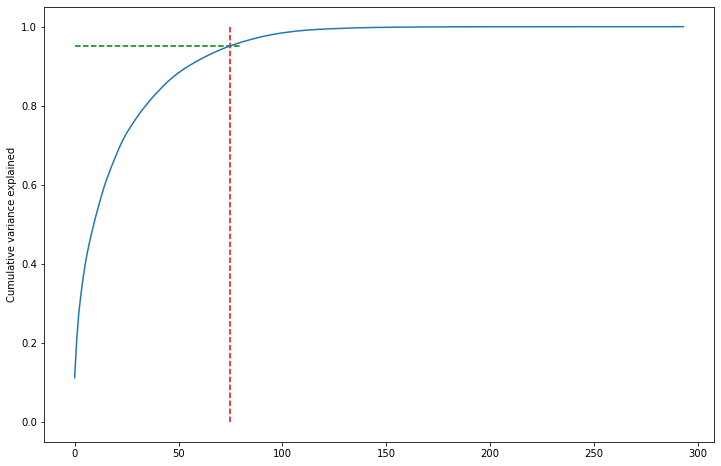

In [156]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=75, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 75 components

In [157]:
from sklearn.decomposition import IncrementalPCA

In [159]:
pca_final = IncrementalPCA(n_components=75)

In [160]:
df_train_pca = pca_final.fit_transform(x_train)

In [161]:
df_train_pca.shape

(21000, 75)

In [162]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [163]:
corrmat.shape

(75, 75)

### Plotting the heatmap of the corr matrix

<AxesSubplot:>

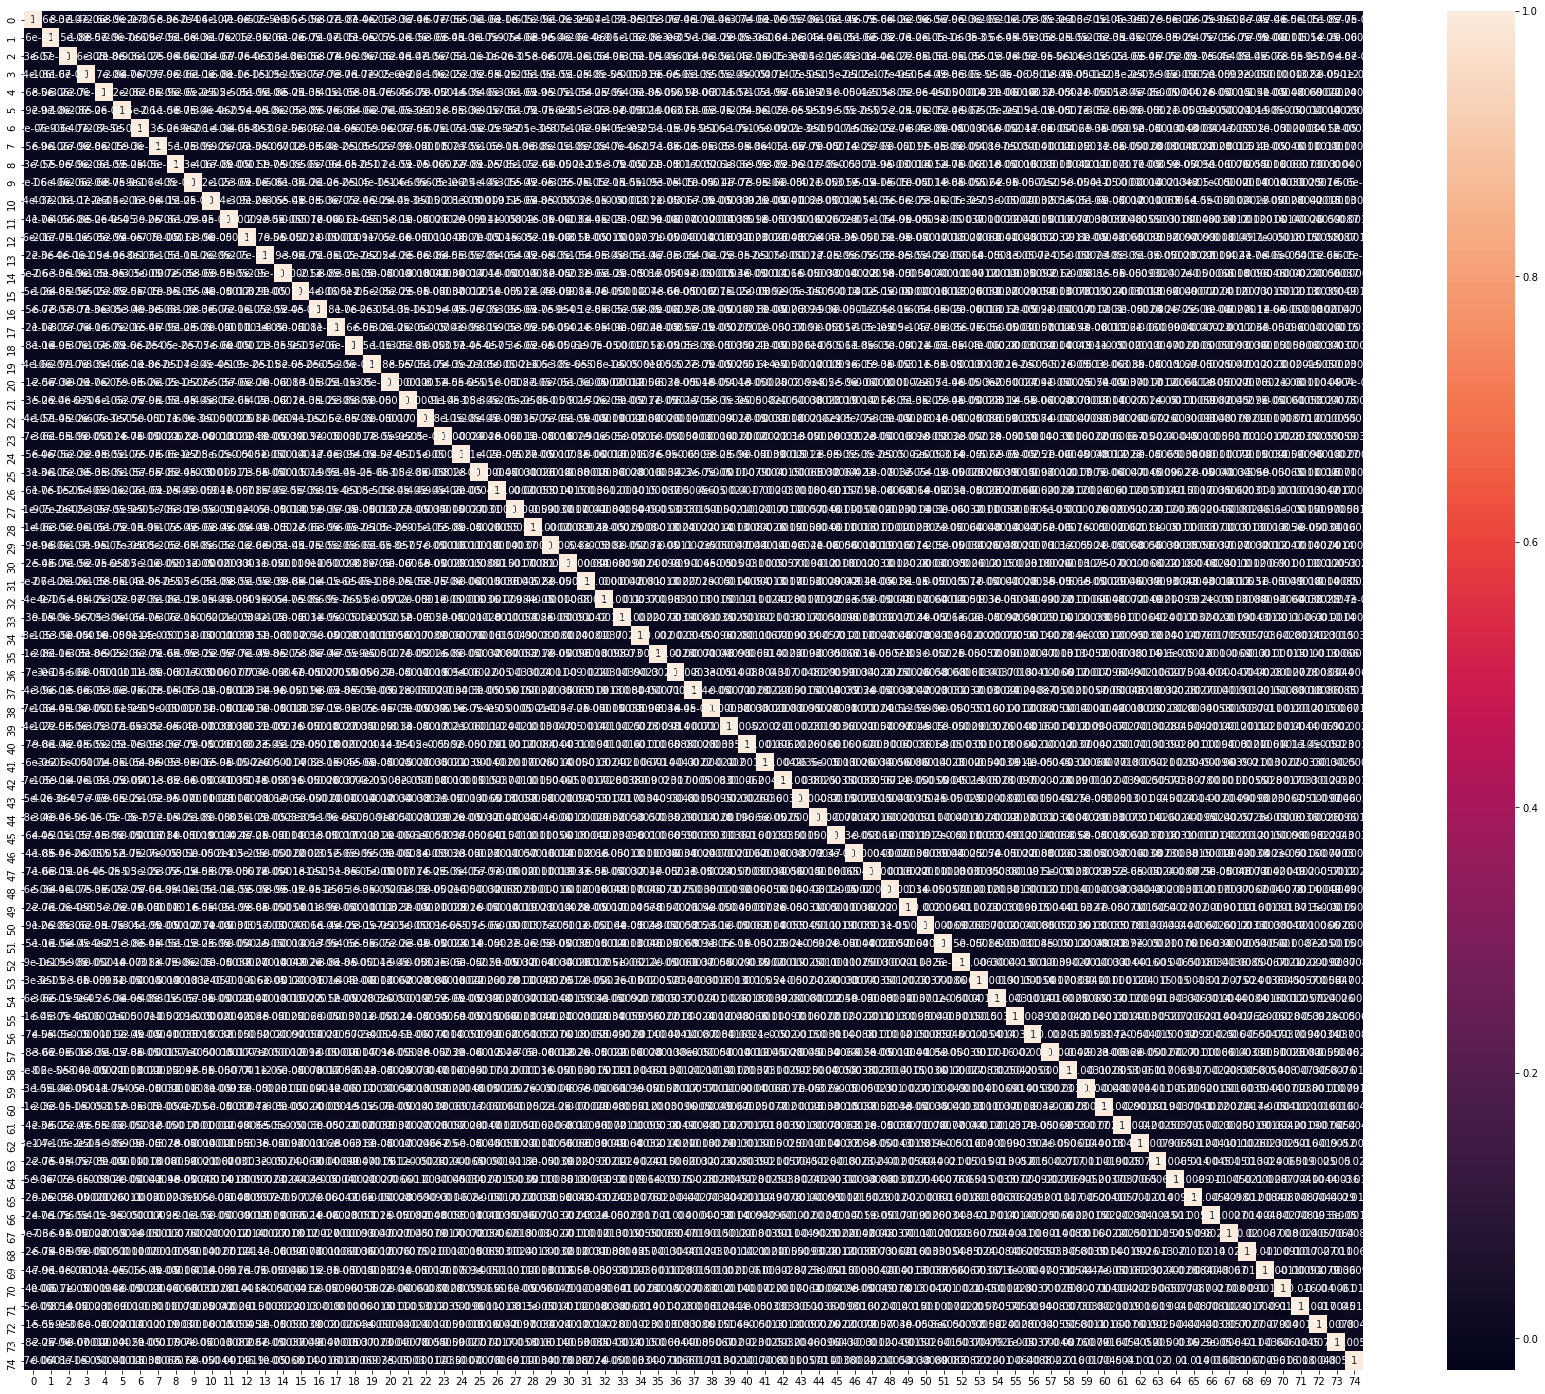

In [164]:
plt.figure(figsize=[30,25])
sns.heatmap(corrmat, annot=True)

In [165]:
df_test_pca = pca_final.transform(x_test)
df_test_pca.shape

(9001, 75)

## Applying logistic regression on the data on our Principal components

In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
learner_pca = LogisticRegression(class_weight = 'balanced')

In [168]:
model_pca = learner_pca.fit(df_train_pca, y_train)

## Making predictions on the test set

In [169]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [170]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

# Using Decision Trees

In [171]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
dt_base = DecisionTreeClassifier(class_weight='balanced',random_state=42, max_depth=4)

In [173]:
dt_model_pca = dt_base.fit(df_train_pca, y_train)

In [174]:
dt_model_pca

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [175]:
y_train_pred = dt_base.predict(df_train_pca)
y_test_pred = dt_base.predict(df_test_pca)

In [176]:
from sklearn.metrics import classification_report

In [177]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8262
           1       0.25      0.70      0.36       739

    accuracy                           0.80      9001
   macro avg       0.61      0.75      0.62      9001
weighted avg       0.91      0.80      0.84      9001



## Plot the ROC curve

In [178]:
from sklearn.metrics import plot_roc_curve

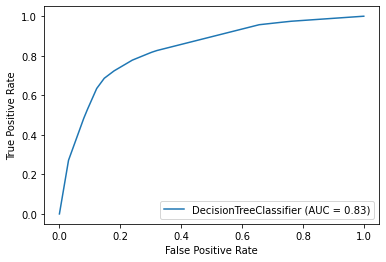

In [179]:
plot_roc_curve(dt_base, df_train_pca, y_train, drop_intermediate=False)
plt.show()

### Hyper-parameter tuning for the Decision Tree

In [180]:
from sklearn.model_selection import GridSearchCV

In [181]:
dt = DecisionTreeClassifier(class_weight='balanced',random_state=42)

In [182]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [183]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [184]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   42.5s finished


Wall time: 45 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [185]:
grid_search.best_score_

0.8539047619047619

In [969]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, random_state=42)

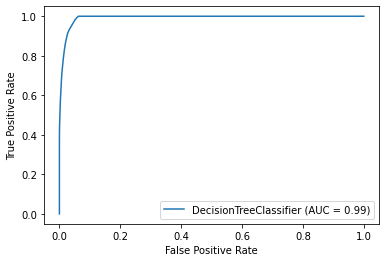

In [971]:
plot_roc_curve(dt_best, df_train_pca, y_train)
plt.show()

## Using Random Forest

In [972]:
from sklearn.ensemble import RandomForestClassifier

In [975]:
rf = RandomForestClassifier(class_weight='balanced',n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [976]:
%%time
rf.fit(df_train_pca, y_train)

Wall time: 432 ms


RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       n_estimators=10, oob_score=True, random_state=100)

In [977]:
rf.oob_score_

0.7700262091970456

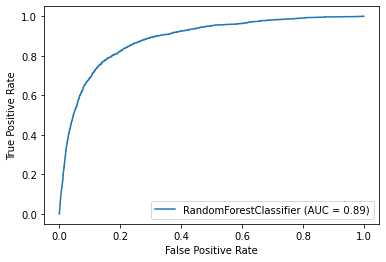

In [978]:
plot_roc_curve(rf, df_train_pca, y_train)
plt.show()

## Hyper-parameter tuning for the Random Forest

In [979]:
rf = RandomForestClassifier(class_weight='balanced',random_state=42, n_jobs=-1)

In [980]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [981]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [983]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  7.0min finished


Wall time: 7min 2s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [984]:
grid_search.best_score_

0.926757141182867

In [985]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, n_jobs=-1, random_state=42)

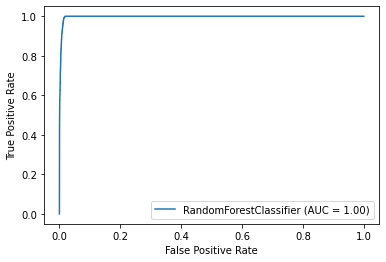

In [986]:
plot_roc_curve(rf_best, df_train_pca, y_train)
plt.show()